# Video Game Sales Over The Years

***

## Introduction

The dataset I have chosen to investigate for my project is based on video games. I chose this dataset because I have a keen interest in video games and I believe that they have become more popular since covid-19 so I decided to test my theory. I researched ready available datasets online and settled on a dataset that had the most recent data. I found my dataset on a website called [Kaggle](https://www.kaggle.com/code/holmjason2/video-game-sales-analysis). I decided to use the number of sales per game as a measure.[4][5]

### The Dataset
The dataset contains 7 columns:
1. <b>Rank</b>(int) - Ranks the video games based on the Total_Shipped column with No.1 being the game with max value
2. <b>Name</b>(object) - Name of the video game
3. <b>Platform</b>(object) - The console the game was sold for 
4. <b>Publisher</b>(object) - The video game company that published the game
5. <b>Developer</b>(object) - The software developement department within the company that made the game
6. <b>Critic_Score</b>(float) - Score given by critics
7. <b>User_Score</b>(float)- Score given by players
8. <b>Total_Shipped</b>(float) - Total amount of games shipped after purchased by players
9. <b>Year</b>(int) - Year the game was released

In [1]:
#Necessary Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
#Read in csv file containing video game data
dataset = pd.read_csv("game_sales_data.csv",encoding='latin1')
dataset.head()

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017


### Exploratory Analysis
***

In [4]:
dataset.describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Year
count,19600.000000,9969.000000,2223.000000,19600.000000,19600.000000
mean,9798.539133,7.034848,6.994872,0.551123,2007.789949
std,5658.110539,1.558968,1.517038,1.671466,6.326169
min,1.000000,0.800000,1.000000,0.010000,1977.000000
25%,4898.750000,6.100000,6.300000,0.050000,2004.000000
50%,9798.500000,7.300000,7.200000,0.160000,2008.000000
75%,14698.250000,8.200000,8.000000,0.460000,2012.000000
max,19598.000000,10.000000,10.000000,82.900000,2020.000000


### Dataset Information:
Using the table above we can see some information about the dataset. The "count" row shows us the number of rows under each column, the "mean" gives us the average value, "std" stands for standard deviation of values in each column, "min" shows the smallest value recorded, "25%" and "50%" and "75%" are all percentiles where "50%" is also called the median and lastly "max" stands for the largest value in each column.

After reading through this summary of the dataset I can see there are less rows under the columns "Critic_Score" and "User_Score" than the other three columns due to there being some values missing but since I'm mainly interested in sales I'm not too concerned. I can see there are 19600 rows of sales data and the "min" value under "Year" appears to be 1977 therefore I'm going to change my dataset to only look at sales from 1990 onwards since I don't have much interest in years before that.

In [22]:
#dataset.loc locates all the columns under Year and the locates all the values equal to or greater than 1990
dataset= dataset.loc[dataset.loc[:,'Year']>= 2000]
dataset.head()

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017
5,6,Minecraft,PC,Mojang,Mojang AB,10.0,7.8,33.15,2010


Check that the new dataset goes back as far 2000:

In [23]:
#Min value of column 'Year'
np.min(dataset['Year'])

2000

In [5]:
#check how many rows of data we have now
dataset.count()

Rank             17682
Name             17682
Platform         17682
Publisher        17682
Developer        17680
Critic_Score      9198
User_Score        2191
Total_Shipped    17682
Year             17682
dtype: int64

Next we can get rid of the columns in the dataset that we don't need and that are not appropriate for the further data analysis

In [6]:
#getting rid of columns 
dataset.drop(['Name', 'Platform','Publisher','Developer'], axis=1)

,Rank,Critic_Score,User_Score,Total_Shipped,Year
0,1,7.7,8.0,82.90,2006
2,3,8.0,7.5,40.00,2012
3,4,8.2,9.1,37.32,2008
4,5,8.6,4.7,36.60,2017
5,6,10.0,7.8,33.15,2010
...,...,...,...,...,...
19595,19594,NaN,NaN,0.01,2004
19596,19595,9.4,NaN,0.01,2003
19597,19596,NaN,NaN,0.01,2002
19598,19597,NaN,NaN,0.01,2017


In [9]:
dataset.mean()

C:\Users\Owner\AppData\Local\Temp/ipykernel_7748/1799472221.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.mean()


Rank             10064.888191
Critic_Score         7.031474
User_Score           6.974076
Total_Shipped        0.517876
Year              2009.154394
dtype: float64

## Analysis Of Relationships Between Variables

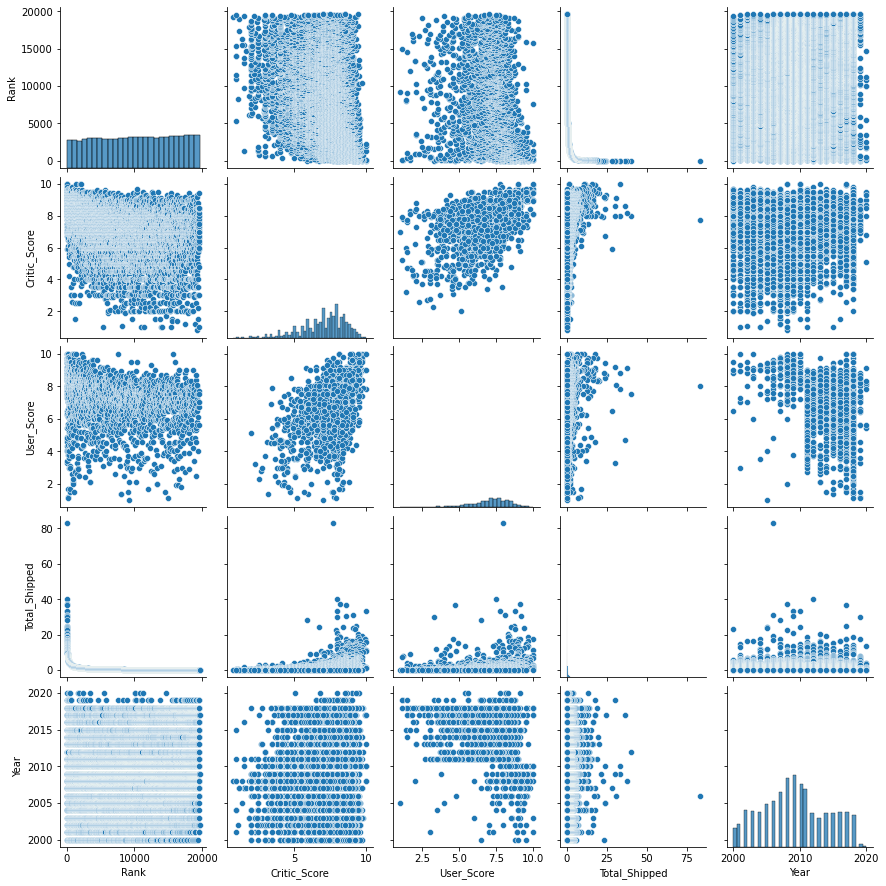

In [10]:
sns.pairplot(dataset)

In [11]:
dataset.corr()

,Rank,Critic_Score,User_Score,Total_Shipped,Year
Rank,1.000000,-0.349334,-0.191003,-0.418272,0.120611
Critic_Score,-0.349334,1.000000,0.508592,0.230509,0.075076
User_Score,-0.191003,0.508592,1.000000,0.125765,-0.240227
Total_Shipped,-0.418272,0.230509,0.125765,1.000000,0.001499
Year,0.120611,0.075076,-0.240227,0.001499,1.000000


### Analysis:

The pairplots accompanied by the above correlation table shows us the relationships between each of the variables. From initially analysing the pairplots I would have said the strongest relationship was between 'Rank' and 'Total_Shipped' but the strongest correlation coefficient appears to be between 'Critic_Score' and 'User_Score' with a value of 0.508592 which is the closest value to 1 and since it's positive we know as one variable increases in value so those the other variable which makes sense because if Users give a high score then critics are more likely to give a high score and vice versa.

***

### Relationship With Sales:

Now lets have a closer look at the factors affecting sales. I didn't include 'Rank' because this variable is created based on sales we know it's a measure from max sales to min sales. I also included 'Year' as a variable because even though it's correlation coefficient with 'Total Shipped' is very weak that just means that there is not a linear relationship between them but I want to see in which years video games were more popular.

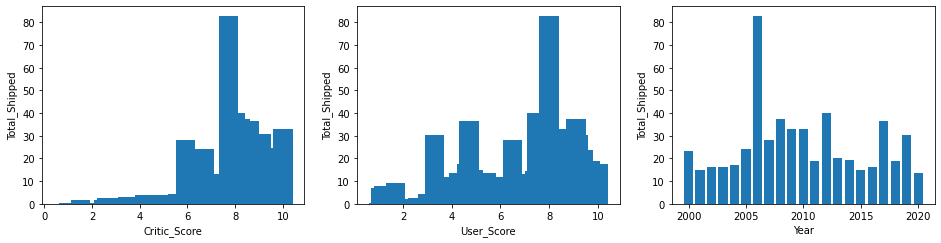

In [12]:
#Make 3 adjacent plots [1],[2],[3]
plt.figure(figsize=(16,8))

x= dataset['Critic_Score']
y= dataset['Total_Shipped']

plt.subplot(2, 3, 1)
plt.xlabel("Critic_Score")
plt.ylabel("Total_Shipped")
plt.bar(x,y)

x = dataset['User_Score']
y= dataset['Total_Shipped']

plt.subplot(2, 3, 2)
plt.xlabel("User_Score")
plt.ylabel("Total_Shipped")
plt.bar(x,y)

x =dataset['Year']
y= dataset['Total_Shipped']

plt.subplot(2, 3, 3)
plt.xlabel("Year")
plt.ylabel("Total_Shipped")
plt.bar(x,y)

plt.show()

## Synthesising More Data:

### Using Time Series

In [7]:
#check data type of year column
dataset['Year']

0        2006
2        2012
3        2008
4        2017
5        2010
         ... 
19595    2004
19596    2003
19597    2002
19598    2017
19599    2009
Name: Year, Length: 17682, dtype: int64

In [29]:
#Convert Year column to datetime []
dataset['Year']=pd.to_datetime(dataset['Year'], format = '%Y')

In [56]:
#check Year column 
dataset.head(60)

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006-01-01
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012-01-01
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008-01-01
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017-01-01
5,6,Minecraft,PC,Mojang,Mojang AB,10.0,7.8,33.15,2010-01-01
6,7,Wii Sports Resort,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.13,2009-01-01
8,9,New Super Mario Bros.,DS,Nintendo,Nintendo EAD,9.1,8.1,30.80,2006-01-01
9,10,New Super Mario Bros. Wii,Wii,Nintendo,Nintendo EAD,8.6,9.2,30.30,2009-01-01
11,12,Call of Duty: Modern Warfare,PS4,Activision,Infinity Ward,8.0,3.3,30.13,2019-01-01
13,14,Wii Play,Wii,Nintendo,Nintendo EAD,5.9,6.5,28.02,2007-01-01


<AxesSubplot:xlabel='Year'>

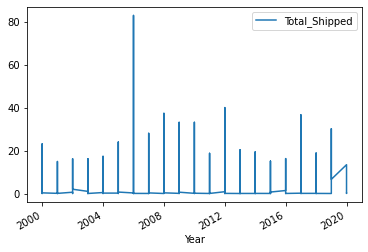

In [46]:
dataset.plot('Year','Total_Shipped')

C:\Users\Owner\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


<AxesSubplot:xlabel='Year'>

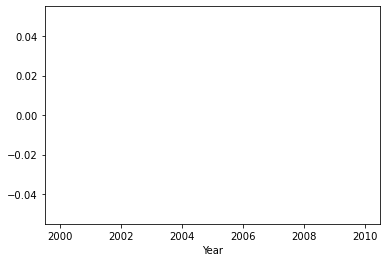

In [53]:
Year = dataset['Year']
Total_Shipped = dataset['Total_Shipped']

sns.lineplot(data = dataset, x = "Year")


In [38]:
dataset['Total_Shipped'].groupby([dataset['Year'].dt.year]).agg('count')

Year
2000     412
2001     508
2002     821
2003     813
2004     785
2005     964
2006    1035
2007    1236
2008    1536
2009    1616
2010    1401
2011    1299
2012     755
2013     639
2014     755
2015     759
2016     780
2017     789
2018     703
2019      63
2020      13
Name: Total_Shipped, dtype: int64

In [54]:
#[6][7]
idx= pd.date_range("2000", periods= 20, freq= "A")
idx

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

<AxesSubplot:xlabel='Year'>

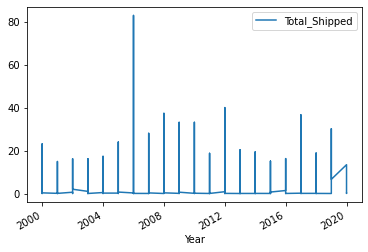

In [65]:
train_df = dataset[['Total_Shipped','Year']]
trend_col = dataset['Total_Shipped']
train_df.set_index('Year').plot()

In [67]:
def trends_only(source_df: pd.DataFrame, trend_col: str) -> (float, pd.DataFrame):
    """ Extract trends as training features vs total volume """
    df = source_df.copy()
    start_val = df.at[0, trend_col]
    df.sin = df[[trend_col]].diff()
    df.at[0, trend_col] = 0.00
    return start_val, df

In [68]:
def restore_daily(source_df: pd.DataFrame, start_val: float, trend_col: str):
    """ Restore daily cumulative values from trend data """
    df = source_df.copy()
    df.at[0, trend_col] = start_val
    df[trend_col] = df[trend_col].cumsum()
    df[trend_col] = df[trend_col].apply(pd.to_numeric, downcast='float', errors='coerce').round(2)
    df.dropna(inplace=True)
    return df

# Extract trends from timeseries column to create training set
start_val, trends_df = trends_only(train_df, trend_col)
trends_df

TypeError: unhashable type: 'Series'

## References

[1] https://www.folkstalk.com/tech/matplotlib-figure-size-not-working-with-code-examples/

[2] https://www.w3schools.com/python/matplotlib_subplot.asp

[3] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

[4] https://github.com/ZainNasrullah/VGChartz-VideoGameSales-Analysis/blob/master/Project.ipynb

[5] https://www.kaggle.com/code/holmjason2/video-game-sales-analysis/notebook

[6] https://towardsdatascience.com/creating-synthetic-time-series-data-67223ff08e34

[7] https://stackoverflow.com/questions/32168848/how-to-create-a-pandas-datetimeindex-with-year-as-frequency

[8] https://www.analyticsvidhya.com/blog/2022/06/time-series-forecasting-using-python/

[9] https://stackoverflow.com/questions/46658232/pandas-convert-column-with-year-integer-to-datetime